In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression , Ridge , LogisticRegression
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error
from scipy import stats
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from graphviz import Source
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix , classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')
sns.set(style="darkgrid")

plt.style.use('fivethirtyeight')

In [2]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn import preprocessing

In [31]:
train=pd.read_csv('C:\\Users\\jurk\\Desktop\heart\\framingham.csv')
train.head().style.set_properties(subset=['TenYearCHD'], **{'background-color': 'dodgerblue'})

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.000000,0,0.000000,0.000000,0,0,0,195.000000,106.000000,70.000000,26.970000,80.000000,77.000000,0
1,0,46,2.000000,0,0.000000,0.000000,0,0,0,250.000000,121.000000,81.000000,28.730000,95.000000,76.000000,0
2,1,48,1.000000,1,20.000000,0.000000,0,0,0,245.000000,127.500000,80.000000,25.340000,75.000000,70.000000,0
3,0,61,3.000000,1,30.000000,0.000000,0,1,0,225.000000,150.000000,95.000000,28.580000,65.000000,103.000000,1
4,0,46,3.000000,1,23.000000,0.000000,0,0,0,285.000000,130.000000,84.000000,23.100000,85.000000,85.000000,0


In [4]:
def dataset_overview(data, col):
    
    print("------------")
    #print(data.head())
    print("-----------")
    print("---------------")

    print(data.columns)
    print("------------")
    print("---------------")

    print("Shape of the dataset")
    print(data.shape)
    print("-------------")
    print("---------------")

    print("Null Value counts")
    print(data.isnull().sum())
    print("-------------")
    print("---------------")

    print("dataset informaation")
    print(data.info())
    print("---------------")
    print("---------------")
    
    print("The outcome values",data[col].value_counts(normalize=True))
    plt.figure(figsize=(10,5))
    print(sns.countplot(x=col, data=data))
    plt.show()

------------
-----------
---------------
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
------------
---------------
Shape of the dataset
(4238, 16)
-------------
---------------
Null Value counts
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64
-------------
---------------
dataset informaation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           ---------

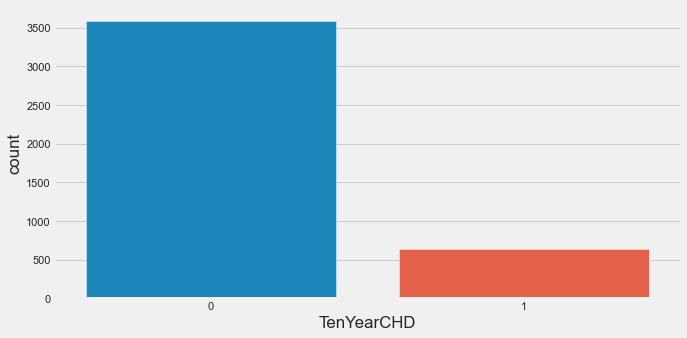

In [6]:
dataset_overview(train, 'TenYearCHD')

In [7]:
for _ in train.columns:
    print("The number of null values in:{} == {}".format(_, train[_].isnull().sum()))

The number of null values in:male == 0
The number of null values in:age == 0
The number of null values in:education == 105
The number of null values in:currentSmoker == 0
The number of null values in:cigsPerDay == 29
The number of null values in:BPMeds == 53
The number of null values in:prevalentStroke == 0
The number of null values in:prevalentHyp == 0
The number of null values in:diabetes == 0
The number of null values in:totChol == 50
The number of null values in:sysBP == 0
The number of null values in:diaBP == 0
The number of null values in:BMI == 19
The number of null values in:heartRate == 1
The number of null values in:glucose == 388
The number of null values in:TenYearCHD == 0


# PLoting the columns with Missing values


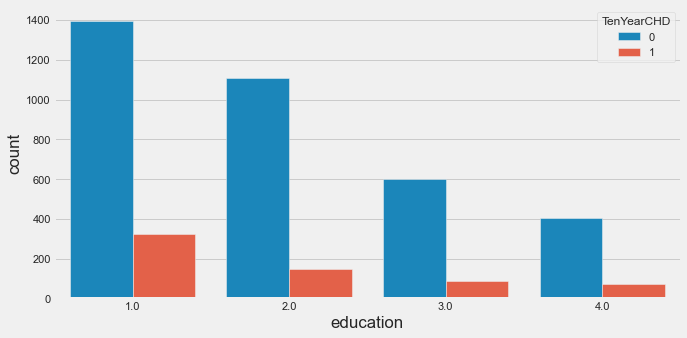

In [29]:
plt.figure(figsize=(10,5))
sns.countplot(train['education'], hue=train['TenYearCHD'])
plt.show()

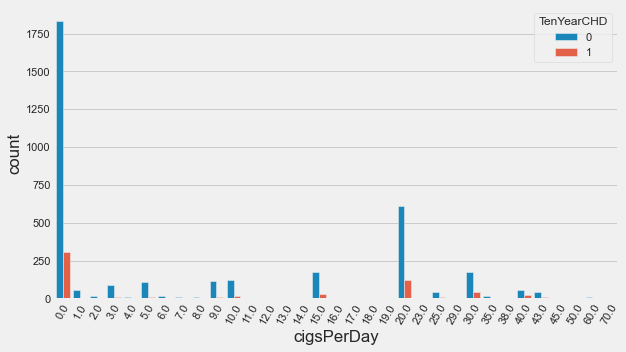

In [28]:
plt.figure(figsize=(9,5))
sns.countplot(train['cigsPerDay'], hue=train['TenYearCHD'])
plt.xticks(rotation=60)
plt.show()

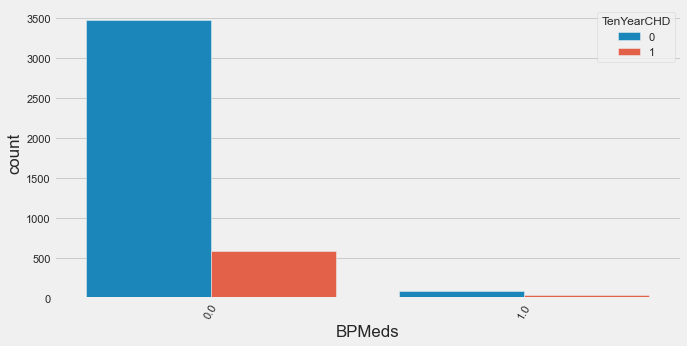

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(train['BPMeds'], hue=train['TenYearCHD'])
plt.xticks(rotation=60)
plt.show()

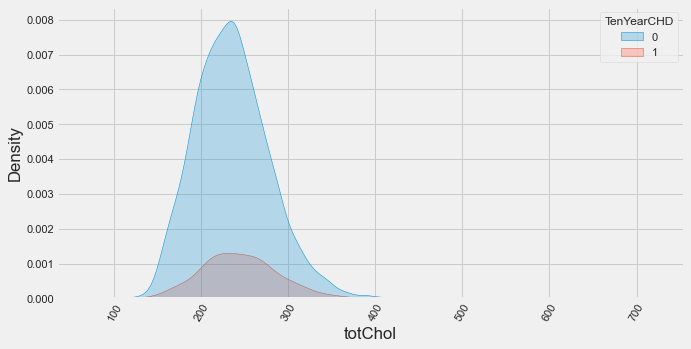

In [26]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['totChol'], shade=True, hue=train['TenYearCHD'])
plt.xticks(rotation=60)
plt.show()

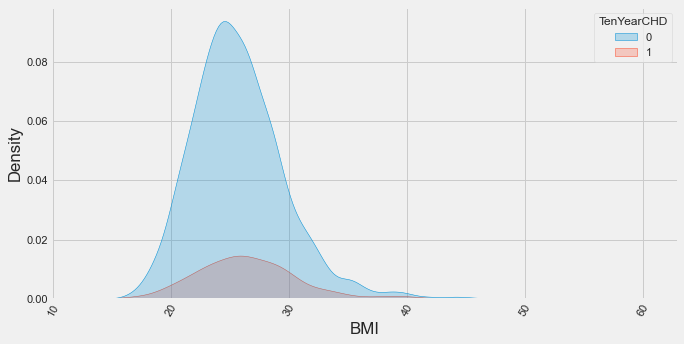

In [25]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['BMI'], shade=True, hue=train['TenYearCHD'])
plt.xticks(rotation=60)
plt.show()

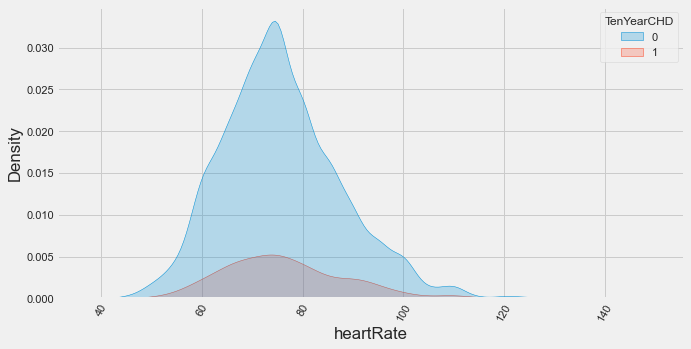

In [22]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['heartRate'],hue=train['TenYearCHD'] ,shade=True)
plt.xticks(rotation=60)
plt.show()

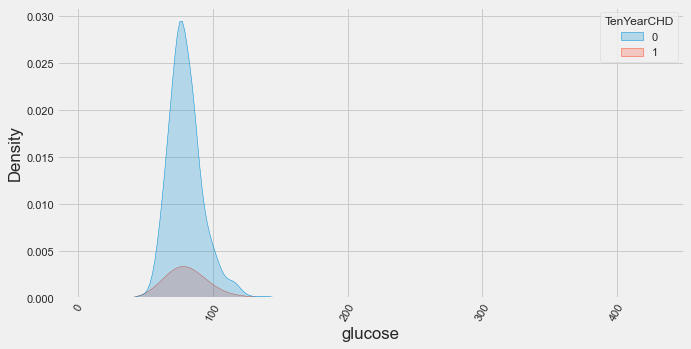

In [24]:
plt.figure(figsize=(10,5))
sns.kdeplot(train['glucose'],hue=train['TenYearCHD'] ,shade=True)
plt.xticks(rotation=60)
plt.show()

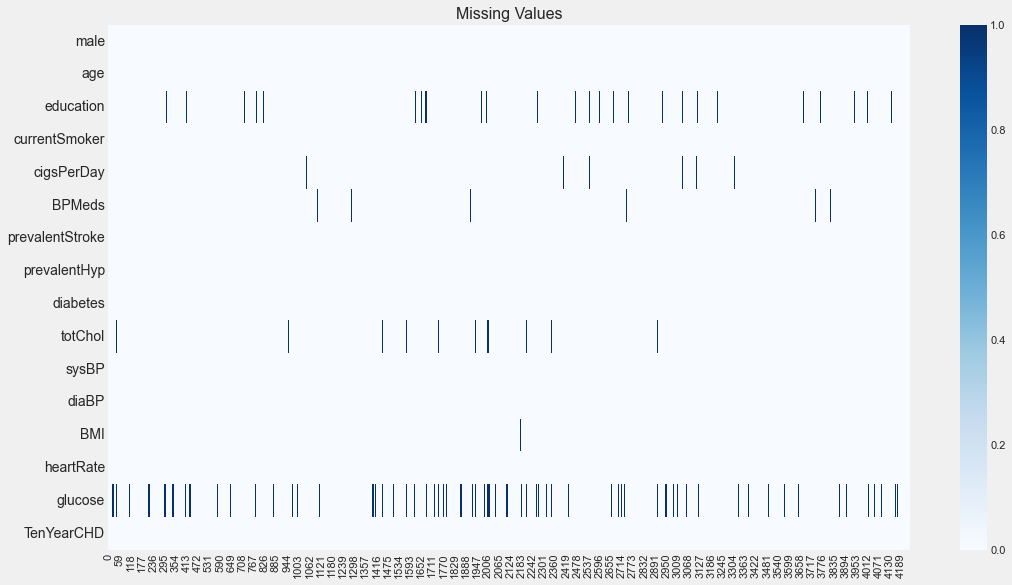

In [32]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(16,9))

sns.heatmap(train.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=16)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14)
plt.show()

In [33]:
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
def correlation_matrix(data):
    corr = data.corr().round(2)

    # Mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set figure size
    f, ax = plt.subplots(figsize=(20, 20))

    # Define custom colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap
    d=sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

    plt.tight_layout()
    return d

<AxesSubplot:>

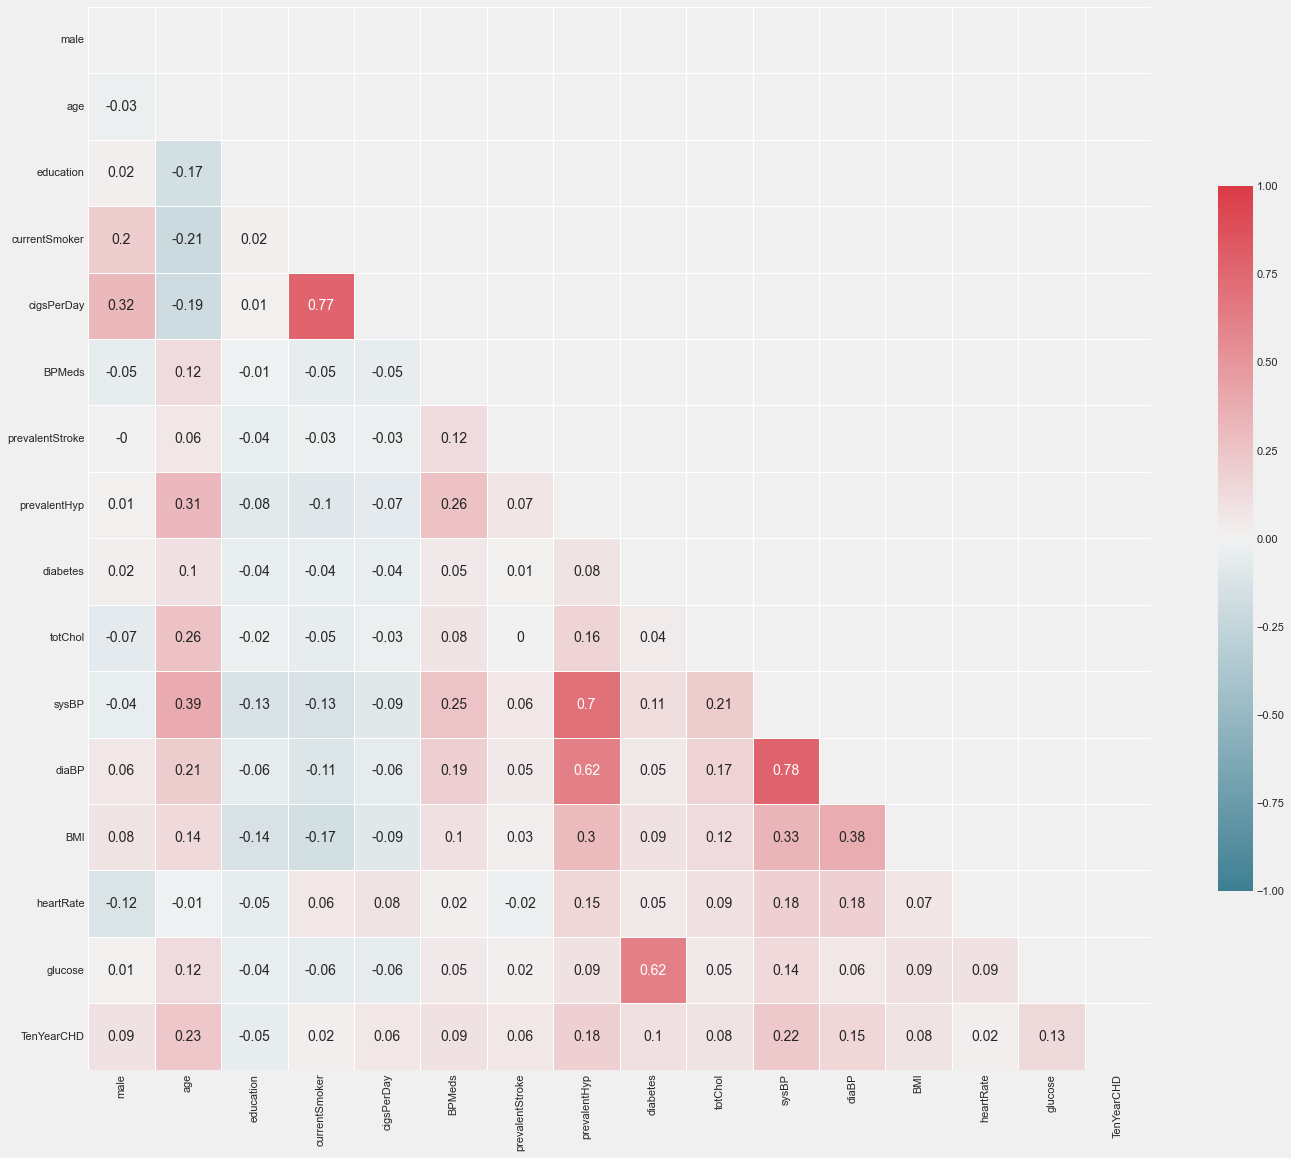

In [35]:
correlation_matrix(train)


In [36]:
train.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [37]:
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

# Dataset spliting 

In [38]:
from sklearn.model_selection import train_test_split

In [40]:
X=train.drop('TenYearCHD', axis=1)
y=train['TenYearCHD']

In [41]:
X.shape, y.shape

((4238, 15), (4238,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3390, 15)
(848, 15)
(3390,)
(848,)


In [44]:
result = pd.concat([X_train, y_train], axis=1, join='inner')
display(result)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3252,1,40,4.0,1,30.0,0.0,0,0,0,205.0,131.0,81.0,23.74,66.0,87.0,0
3946,0,57,2.0,0,0.0,0.0,0,1,0,250.0,152.5,92.5,32.31,75.0,94.0,0
1261,0,47,1.0,0,0.0,0.0,0,0,0,230.0,123.0,71.0,26.98,83.0,73.0,0
2536,1,41,2.0,1,30.0,0.0,0,0,0,228.0,113.0,82.5,25.67,67.0,70.0,0
4089,0,64,1.0,0,0.0,0.0,0,1,0,232.0,149.5,84.0,20.49,68.0,96.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3444,0,36,1.0,1,5.0,0.0,0,1,0,222.0,147.0,94.0,26.79,76.0,71.0,0
466,0,57,3.0,1,15.0,0.0,0,0,0,250.0,125.0,74.0,21.08,80.0,72.0,0
3092,0,60,2.0,0,0.0,0.0,0,1,0,298.0,133.0,89.0,25.09,83.0,81.0,0
3772,1,39,2.0,1,10.0,0.0,0,0,0,215.0,102.0,64.5,24.50,68.0,62.0,0


In [45]:
result.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [46]:
result.to_csv('train.csv')

In [47]:
X_test.to_csv('test.csv')

# Pipeline 

In [52]:
train=pd.read_csv('C:\\Users\\jurk\\Desktop\\heart\\train.csv', index_col=[0])

------------
-----------
---------------
Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')
------------
---------------
Shape of the dataset
(3390, 16)
-------------
---------------
Null Value counts
male                 0
age                  0
education           88
currentSmoker        0
cigsPerDay          24
BPMeds              48
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             42
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            314
TenYearCHD           0
dtype: int64
-------------
---------------
dataset informaation
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3390 entries, 3252 to 860
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           -------

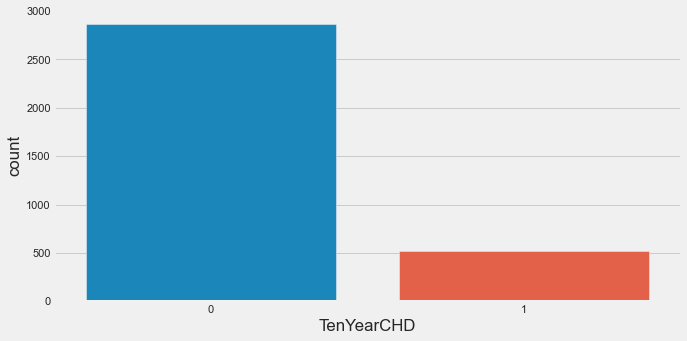

In [53]:
dataset_overview(train, 'TenYearCHD')

In [55]:
train.isna().sum()

male                 0
age                  0
education           88
currentSmoker        0
cigsPerDay          24
BPMeds              48
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             42
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            314
TenYearCHD           0
dtype: int64

In [54]:
train.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [67]:
categorical_features=['male', 'education', 'currentSmoker', 'BPMeds','heartRate']
categorical_transformer = Pipeline(
    [
        ('imputer_cat', SimpleImputer(strategy = 'constant')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

In [57]:
numeric_features=[ 'age',   'cigsPerDay', 
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI',  'glucose']

numeric_transformer = Pipeline(
    [
        ('imputer_num', SimpleImputer(strategy = 'median')),
        ('scaler', StandardScaler())
    ]
)

In [68]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [69]:
pipeline = Pipeline(
    [
        
        ('preprocessing', preprocessor),
        ('clf', LogisticRegression())
    ]
)

# Logistic Regression 

In [70]:
params = {
    'clf__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'clf__penalty': ['l1', 'l2', 'elasticnet', None],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__random_state': [42]
}

In [71]:
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV


In [72]:
cv = KFold(2, shuffle=True, random_state=42)


In [73]:
warnings.filterwarnings('ignore')
ramd_grid = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=200, verbose=1, random_state=42)

In [74]:
X=train.drop('TenYearCHD', axis=1)
y=train.TenYearCHD

In [75]:
import warnings
ramd_grid.fit(X,y)

Fitting 2 folds for each of 100 candidates, totalling 200 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['male',
                                                                                'education',
                                                                                'currentSmoker',
   

In [76]:
ramd_grid.best_params_


{'clf__solver': 'liblinear',
 'clf__random_state': 42,
 'clf__penalty': 'l1',
 'clf__C': 100}

In [95]:
# Get the performance of the model in the train set
y_pred_train_rc = ramd_grid.predict(X)
lr_score=classification_report(y, y_pred_train_rc)
print(lr_score)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2870
           1       0.69      0.13      0.21       520

    accuracy                           0.86      3390
   macro avg       0.77      0.56      0.57      3390
weighted avg       0.84      0.86      0.81      3390



# Random Forest

In [78]:
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', RandomForestClassifier())
    ]
)

In [79]:
params={ "clf__n_estimators": [10, 100, 1000],
         "clf__criterion": ['gini', 'entropy'],
                 "clf__max_depth":[5,8,15,25,30,None],
                 "clf__min_samples_leaf":[1,2,5,10,15,100],
                 "clf__max_leaf_nodes": [2, 5,10]
       }

In [80]:
cv = KFold(2, shuffle=True, random_state=42)


In [81]:
warnings.filterwarnings('ignore')
ramd_grid_rf = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=200, verbose=1, random_state=42)

In [82]:
import warnings
ramd_grid_rf.fit(X,y)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['male',
                                                                                'education',
                                                                                'currentSmoker',
   

In [83]:
ramd_grid_rf.best_params_


{'clf__n_estimators': 10,
 'clf__min_samples_leaf': 5,
 'clf__max_leaf_nodes': 10,
 'clf__max_depth': 5,
 'clf__criterion': 'gini'}

In [97]:
# Get the performance of the model in the train set
y_pred_train_rf = ramd_grid_rf.predict(X)
rf_score=classification_report(y, y_pred_train_rf)
print(rf_score)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2870
           1       1.00      0.00      0.00       520

    accuracy                           0.85      3390
   macro avg       0.92      0.50      0.46      3390
weighted avg       0.87      0.85      0.78      3390



# Pipeline Using XGBoost


In [85]:
preprocessor = ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop'
)

In [86]:
# Create the pipeline, with the tranformer and the model
pipeline = Pipeline(
    [
        ('preprocessing', preprocessor),
        ('clf', XGBClassifier())
    ]
)

In [87]:
params={
        "clf__n_estimators": np.arange(50, 750, 50), 
        "clf__max_depth": np.arange(2, 10, 1),
        'clf__lambda': [0.5,0.75,1,1.5],
        'clf__alpha': [0,0.5,0.75,1,1.5]
    }

In [88]:
cv = KFold(2, shuffle=True, random_state=42)


In [89]:
warnings.filterwarnings('ignore')
ramd_grid_xb = RandomizedSearchCV(pipeline, params, scoring="f1", n_jobs=-1, cv=cv, n_iter=200, verbose=1, random_state=42)

In [90]:
import warnings
ramd_grid_xb.fit(X,y)

Fitting 2 folds for each of 200 candidates, totalling 400 fits
[18:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('categoricals',
                                                                               Pipeline(steps=[('imputer_cat',
                                                                                                SimpleImputer(strategy='constant')),
                                                                                               ('onehot',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['male',
                                                                                'education',
                                                                                'currentSmoker',
   

In [91]:
ramd_grid_xb.best_params_


{'clf__n_estimators': 450,
 'clf__max_depth': 2,
 'clf__lambda': 1,
 'clf__alpha': 0.5}

In [96]:
# Get the performance of the model in the train set
y_pred_train_xb = ramd_grid_xb.predict(X)
xgb_evaluation=classification_report(y, y_pred_train_xb)
print(xgb_evaluation)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2870
           1       0.97      0.37      0.54       520

    accuracy                           0.90      3390
   macro avg       0.94      0.68      0.74      3390
weighted avg       0.91      0.90      0.88      3390



# Model Comparision 

In [105]:
print("Logistic Regression")
print(lr_score)

Logistic Regression
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      2870
           1       0.69      0.13      0.21       520

    accuracy                           0.86      3390
   macro avg       0.77      0.56      0.57      3390
weighted avg       0.84      0.86      0.81      3390



In [106]:
print("random Forest")
print(rf_score)

random Forest
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2870
           1       1.00      0.00      0.00       520

    accuracy                           0.85      3390
   macro avg       0.92      0.50      0.46      3390
weighted avg       0.87      0.85      0.78      3390



In [107]:
print("XGBoost")
print(xgb_evaluation)

XGBoost
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2870
           1       0.97      0.37      0.54       520

    accuracy                           0.90      3390
   macro avg       0.94      0.68      0.74      3390
weighted avg       0.91      0.90      0.88      3390



> AS we can see that XGBoost is working very good for this dataset. 

# Saving the pipeline in pickle file

In [108]:
import pickle
from joblib import dump, load

In [109]:
dump(ramd_grid_xb, 'heart_disease_pipe.joblib') 


['heart_disease_pipe.joblib']

In [110]:
def prediction_pickle(path_model, path_data):
    s=load(path_model)
    input_data = pd.read_csv(path_data)
    prediction=s.predict(input_data)
    input_data['prediction'] = prediction
    return input_data

In [111]:
path_model_xb='C:\\Users\\jurk\\Desktop\\heart\heart_disease_pipe.joblib'
path_data_xb='C:\\Users\\jurk\\Desktop\\heart\\test.csv'

In [112]:
prediction_pickle(path_model_xb, path_data_xb)


,Unnamed: 0,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,prediction
0,3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
1,764,1,45,3.0,0,0.0,0.0,0,0,0,162.0,125.0,89.0,27.98,85.0,83.0,0
2,3264,0,51,1.0,1,2.0,0.0,0,0,0,261.0,127.0,81.0,20.24,75.0,96.0,0
3,1967,1,45,3.0,1,30.0,0.0,0,0,0,250.0,126.0,89.5,28.68,75.0,92.0,0
4,2185,0,45,2.0,1,3.0,0.0,0,0,0,250.0,130.0,80.0,20.24,90.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
843,3303,1,47,1.0,0,0.0,0.0,0,0,0,259.0,139.0,79.0,29.34,70.0,71.0,0
844,4056,1,44,2.0,0,0.0,0.0,0,0,0,254.0,130.0,80.0,28.15,80.0,74.0,0
845,4210,1,50,1.0,0,0.0,0.0,0,0,0,282.0,126.5,88.0,27.30,85.0,87.0,0
846,3971,1,64,3.0,0,0.0,0.0,0,1,1,195.0,176.0,78.0,24.90,95.0,370.0,1
